<IPython.core.display.Javascript object>


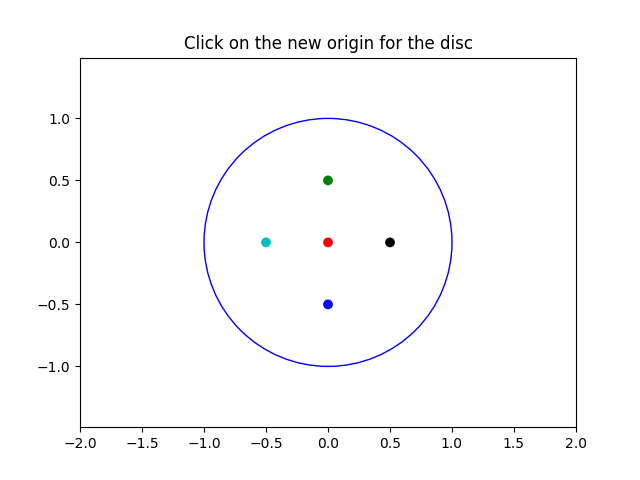

In [136]:
%matplotlib notebook
from functools import partial
from cmath import exp
import matplotlib.pyplot as plt
import numpy as np
n_img = 4
img = np.random.rand(10)
fig,ax = plt.subplots()
ax.axis('equal')
ax.axis([-2, 2, -2, 2])
bound = plt.Circle((0, 0), 1, color='b', fill=False)
ax.add_artist(bound)
scat = None

points = [(0+0j, 'r'), (0+0.5j, 'g'), (0-0.5j, 'b'), (0.5+0j, 'k'), (-0.5+0j, 'c')]

def pltpoints(points):
    global ax
    global scat
    if scat != None:
        scat.remove()
    plt.title('Click on the new origin for the disc')
    coordinates = [coord for coord,_ in points]
    colors = [color for _,color in points]
    scat = ax.scatter(x=[x.real for x in coordinates], y=[y.imag for y in coordinates], color=colors)

def mobius(z, z1, theta=0):
    ret = (exp(1j*theta))*((z-z1)/(1-z*(z1.conjugate())))
    plt.title(str(ret))
    return ret

def onclick(event):
    global points
    click = complex(event.xdata, event.ydata)
    if abs(click) < 1:
        plt.title(str(click))
        points = [(mobius(z, click), c) for z, c in points]
        #plt.title(mobius((0+0j), click))
        pltpoints(points)
    else:
        plt.title(str('clicked off the disc'))

pltpoints(points)
cid = fig.canvas.mpl_connect('button_press_event', onclick)